# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
#%matplotlib inline

Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

Text(0.5, 1.0, 'Статистика клиентов\nпо Германии')

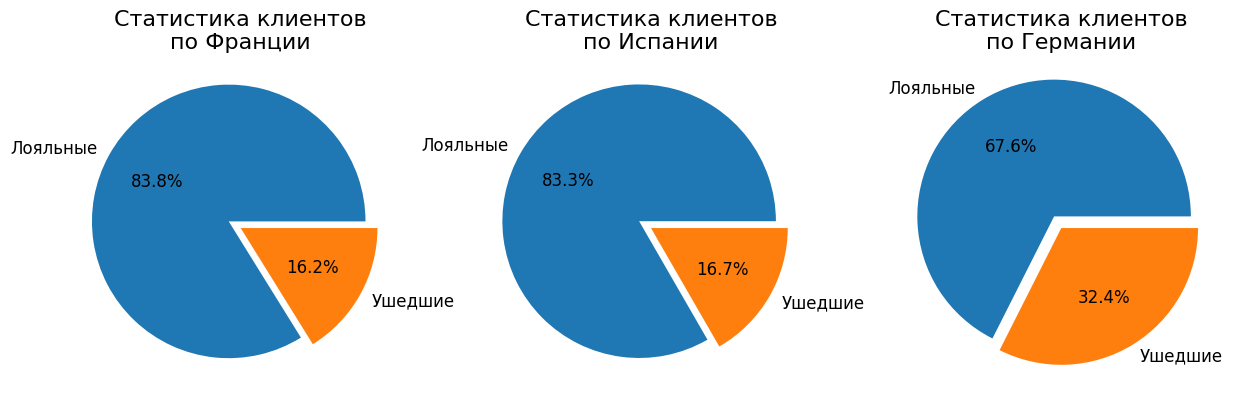

In [3]:
# Ваш код здесь
france_data = churn_data[churn_data["Geography"] == "France"]
spain_data = churn_data[churn_data["Geography"] == "Spain"]
germany_data = churn_data[churn_data["Geography"] == "Germany"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes[0].pie(
    france_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
)
axes[0].set_title('Статистика клиентов\nпо Франции', fontsize=16)

axes[1].pie(
    spain_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes[1].set_title('Статистика клиентов\nпо Испании', fontsize=16)

axes[2].pie(
    germany_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes[2].set_title('Статистика клиентов\nпо Германии', fontsize=16)

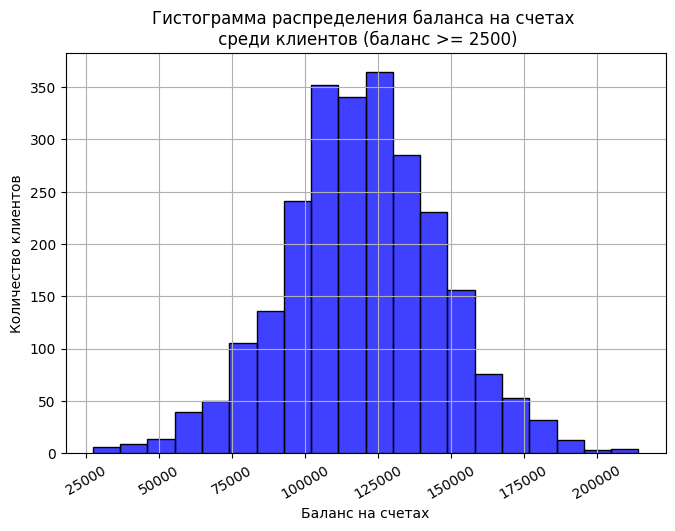

In [4]:
balance_criteria = germany_data[germany_data['Balance'] > 2500]
#balance_criteria['Balance'].describe()

fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    x=balance_criteria['Balance'],
    color='blue', bins=20,
    ax=axes
)
axes.grid()
axes.set_xlabel('Баланс на счетах')
axes.set_ylabel('Количество клиентов')
axes.set_title('Гистограмма распределения баланса на счетах \n среди клиентов (баланс >= 2500)')
axes.xaxis.set_tick_params(rotation=30)

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_22708\1071027802.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])


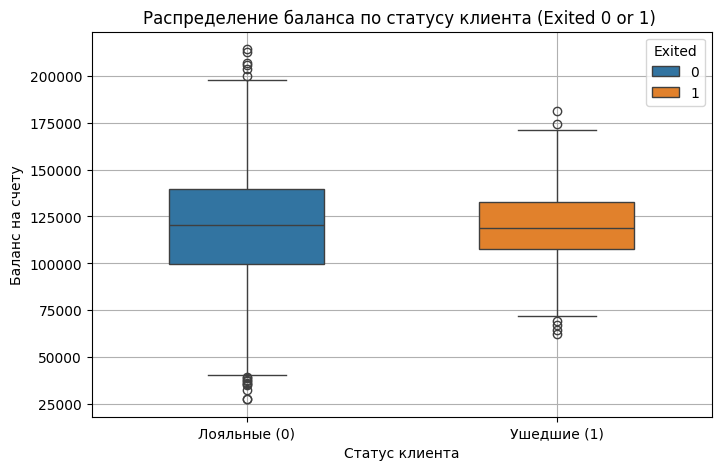

In [5]:
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=germany_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.5,
    hue='Exited'
)
boxplot.set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
boxplot.set_xlabel('Статус клиента')
boxplot.set_ylabel('Баланс на счету')
boxplot.set_title('Распределение баланса по статусу клиента (Exited 0 or 1) ')
boxplot.grid()

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [6]:
germany_data = churn_data[churn_data['Geography'] == 'Germany']
germany_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [7]:
germany_data = germany_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
germany_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [8]:
germany_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [9]:
germany_data[germany_data.duplicated()].sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

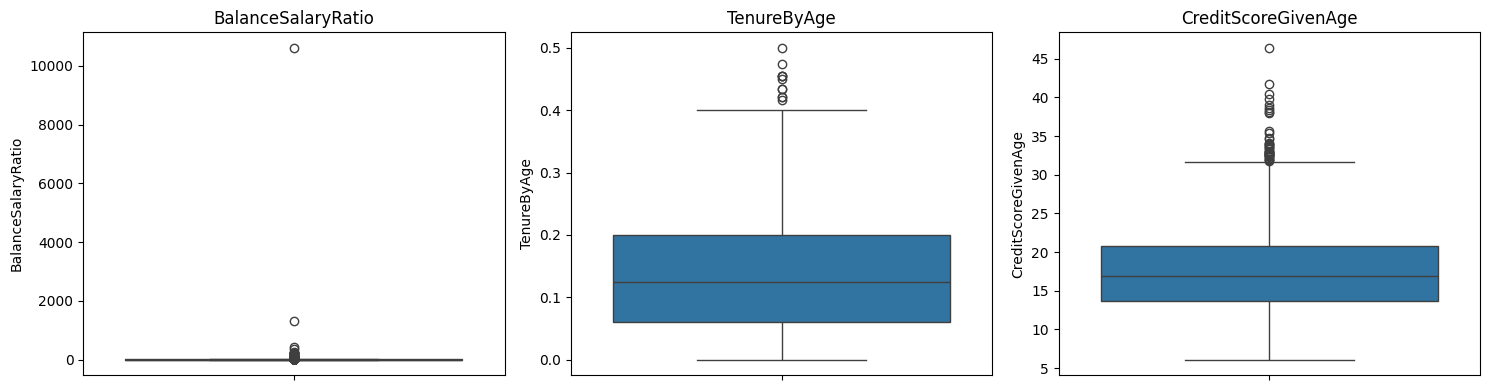

In [10]:
# Ваш код здесь

# 'BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента
germany_data['BalanceSalaryRatio'] = germany_data['Balance'] / germany_data['EstimatedSalary']

# `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента
germany_data['TenureByAge'] = germany_data['Tenure'] / germany_data['Age']

# `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента
germany_data['CreditScoreGivenAge'] = germany_data['CreditScore'] / germany_data['Age']

# Глянем на распределение новых признаков с помощью boxplot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=germany_data['BalanceSalaryRatio'])
plt.title('BalanceSalaryRatio')

plt.subplot(1, 3, 2)
sns.boxplot(y=germany_data['TenureByAge'])
plt.title('TenureByAge')

plt.subplot(1, 3, 3)
sns.boxplot(y=germany_data['CreditScoreGivenAge'])
plt.title('CreditScoreGivenAge')

plt.tight_layout()
plt.show()

In [11]:
germany_data['BalanceSalaryRatio'].describe()

count     2509.000000
mean         9.024870
std        214.286020
min          0.192582
25%          0.783284
50%          1.197220
75%          2.400083
max      10614.655440
Name: BalanceSalaryRatio, dtype: float64

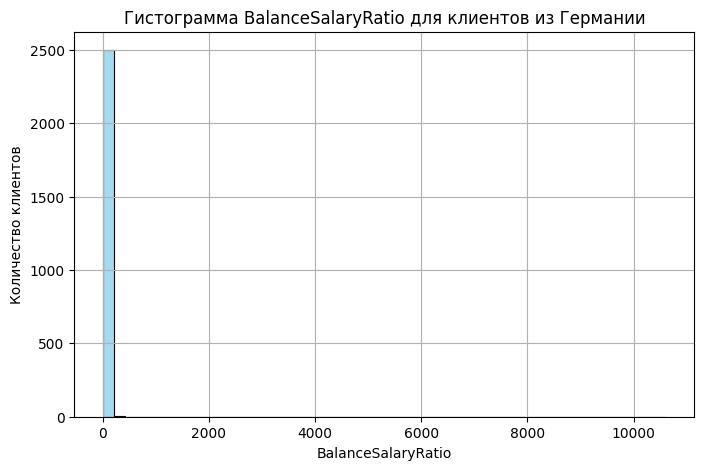

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(germany_data['BalanceSalaryRatio'], bins=50, color='skyblue')
plt.xlabel('BalanceSalaryRatio')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма BalanceSalaryRatio для клиентов из Германии')
plt.grid(True)
plt.show()

#сомнительный признак, возможно, стоит удалить

In [13]:
# Перекодируем категориальные признаки в числовые бинарные столбцы
germany_data = pd.get_dummies(germany_data, drop_first=True)
germany_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Male
7,376,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517,False
15,616,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889,True
16,653,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621,True
26,756,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000,True
28,574,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837,False


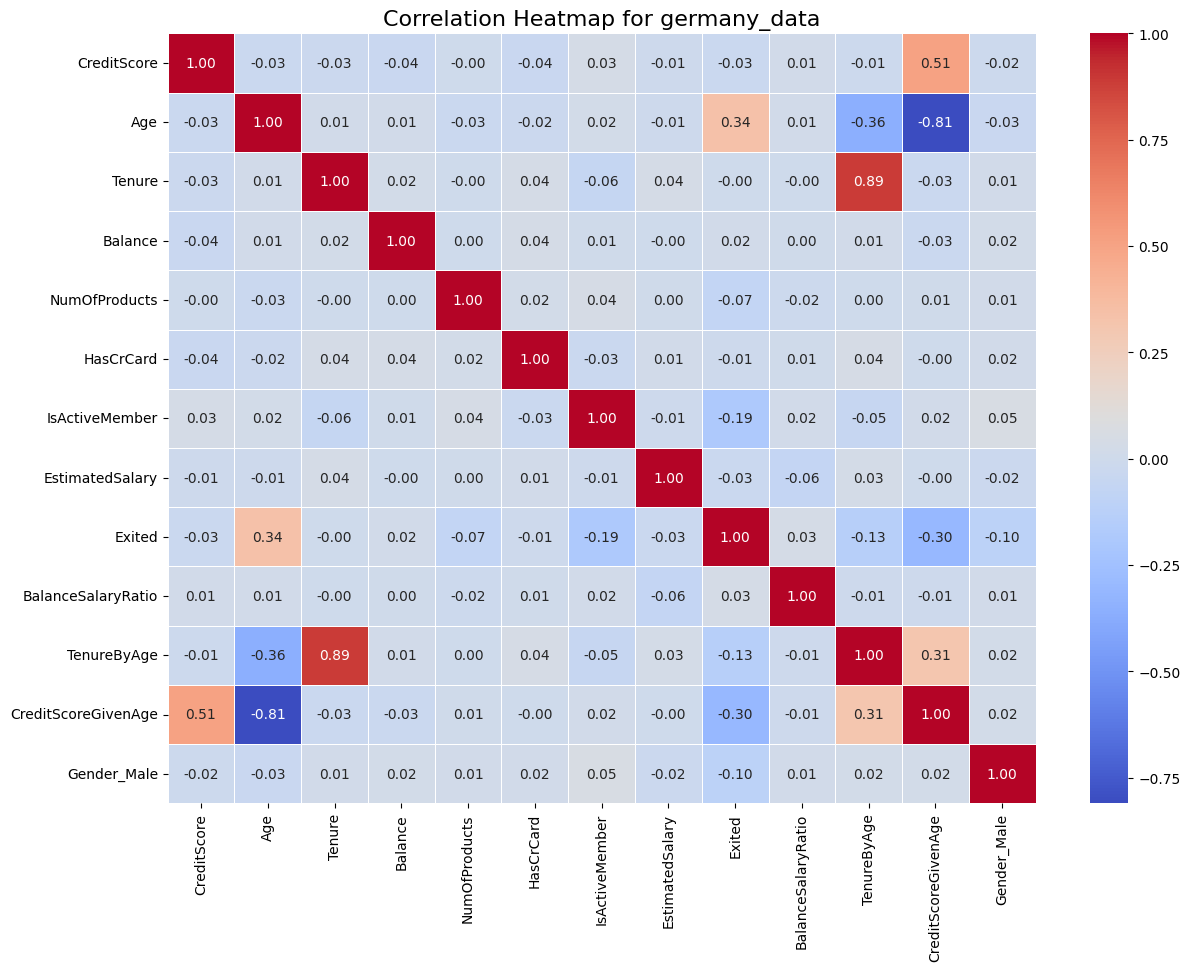

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(germany_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for germany_data", fontsize=16)
plt.show()

In [15]:
# в первой частти задания не было указано удалять признаки, поэтому удалю ['Age', 'Tenure'] во второй части задания. Эти признаки мультиколлениарны.
# F1 метрика была лучше после удаления этих признаков.

Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [16]:
X = germany_data.drop("Exited", axis=1)
y = germany_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [17]:
y.value_counts(normalize=True)

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [19]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


Exited
0    0.675704
1    0.324296
Name: proportion, dtype: float64



Test :


Exited
0    0.675159
1    0.324841
Name: proportion, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [20]:
# Ваш код здесь

# Признаки распределены "ненормально" и необходима нормадизация MinMax scaler или Robust scaler.
# Но выше на графике мы выяснили что есть выбросы и MinMax Scaler нам не подходит изза чувствительности к выбросам. Будем использовать Robust Scaler
scaler = preprocessing.RobustScaler() # 1. Создание скейлера
X_train_scaled = scaler.fit_transform(X_train) # 2. Обучение скейлера на тренировочных данных (fit) и преобразование (transform)
X_test_scaled = scaler.transform(X_test) # 3. Преобразование тестовых данных (transform)

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Укажите название метрики и обоснования своего выбора здесь
>
> **Ответ:** нам подойдет F1 метрика для баланса между preсision и recall


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ваши рассуждения и ответ — *здесь*.
>
> - ***Ложноположительные срабатывания приводят к лишним звонкам клиентам, что увеличивает затраты банка.***
> - ***Ложноотрицательные — к потере клиентов, которых можно было бы удержать.***
>
> ***F1-мера позволяет сбалансировать эти два риска. F1 учитывает как точность (precision), так и полноту (recall), то есть одновременно минимизирует количество ложноположительных и ложноотрицательных срабатываний***

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Ваш код здесь
log_reg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42,
    penalty='l2',
    C=1.0,
    max_iter=1000,
    class_weight='balanced'
)

# Обучение модели
log_reg.fit(X_train_scaled, y_train)

# Предсказания на тренировочной и тестовой выборках
y_train_pred = log_reg.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = log_reg.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1271
           1       0.51      0.71      0.59       610

    accuracy                           0.69      1881
   macro avg       0.67      0.69      0.67      1881
weighted avg       0.73      0.69      0.70      1881

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       424
           1       0.49      0.70      0.58       204

    accuracy                           0.67       628
   macro avg       0.66      0.68      0.65       628
weighted avg       0.71      0.67      0.68       628



> Ваши выводы и рассуждения:
>
> - метод solver='liblinear' показал себя лучше чем 'sag'
>
> - penalty='l2' показал чуть лучший результат по сравнению с penalty='l1'
>
> - C (сила регуляризации) дал лучший результат в диапазоне 0.9-1.3
>
> - class_weight='balanced' балансировка классов дала значительное улучшение метрики F1, recall, precision
>
> Опираясь на полученные результаты метрик, полагаю что модель можно улучшить 

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [22]:
# Ваш код здесь

from sklearn.preprocessing import PolynomialFeatures

# 1. Генерируем полиномиальные признаки 3-й степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 2. Обучаем модель логистической регрессии
log_reg_poly = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42,
    penalty='l2',
    C=0.1,
    max_iter=1000,
    class_weight='balanced'
)
log_reg_poly.fit(X_train_poly, y_train)

# 3. Предсказания и метрики
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
y_test_pred_poly = log_reg_poly.predict(X_test_poly)

print('Train:')
print(metrics.classification_report(y_train, y_train_pred_poly))
print('Test:')
print(metrics.classification_report(y_test, y_test_pred_poly))

Train:
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      1271
           1       0.34      0.53      0.42       610

    accuracy                           0.52      1881
   macro avg       0.52      0.52      0.50      1881
weighted avg       0.58      0.52      0.53      1881

Test:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58       424
           1       0.34      0.53      0.41       204

    accuracy                           0.51       628
   macro avg       0.51      0.52      0.50       628
weighted avg       0.58      0.51      0.52       628



> Ваши выводы и рассуждения:
>
> После добавления полиномиальных признаков третьей степени, F1-мера на тестовой выборке изменилась в худшую сторону.  
Если сравнивать с предыдущей моделью (без полиномиальных признаков), качество на тренировочной выборке ухудшилось, также и на тестовой выборке результат ухудшился.  
>
> F1-score снизился — стоит уменьшить степень полинома. Усиление регуляризации (уменьшить C) незначительно улучшила результаты.
>


### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

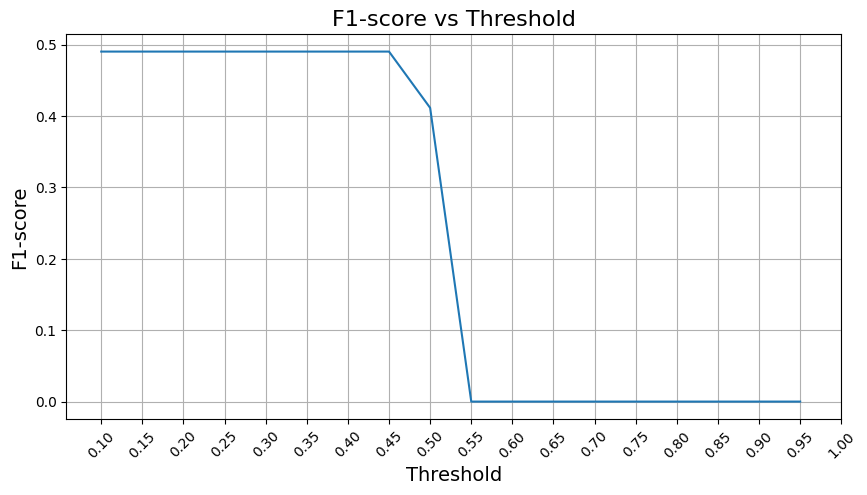

In [23]:
# Ваш код здесь

# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.f1_score(y_test, y_test_pred_poly)
    # Добавляем результат в список
    scores.append(score)

plt.figure(figsize=(10, 5))  
plt.plot(thresholds, scores)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.title('F1-score vs Threshold', fontsize=16)
plt.xticks(np.arange(0.1, 1.05, 0.05), rotation=45) 
plt.grid(True)
plt.show()

> порог вероятности до 0.45 дает наилучшее значение метрики F1

In [24]:
# Предсказания вероятностей для train и test
y_train_proba_pred = pd.Series(log_reg_poly.predict_proba(X_train_poly)[:, 1])
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])

# Оптимальный порог
best_threshold = 0.45

# Предсказания классов по оптимальному порогу
y_train_pred_opt = y_train_proba_pred.apply(lambda x: 1 if x > best_threshold else 0)
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > best_threshold else 0)

# Оценка метрики на train и test
print("Train F1-score:", metrics.f1_score(y_train, y_train_pred_opt))
print("Test F1-score:", metrics.f1_score(y_test, y_test_pred_opt))

Train F1-score: 0.4897631473303894
Test F1-score: 0.49038461538461536


## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [25]:
# Создадим новые признаки:
# Признак: логарифм зарплаты (для уменьшения влияния выбросов)
germany_data['LogSalary'] = np.log1p(germany_data['EstimatedSalary'])

# Категориальный признак: True, если баланс выше медианы, иначе False
germany_data['Balance_above_median'] = germany_data['Balance'] > germany_data['Balance'].median()

# Признак: высокий кредитный рейтинг (True, если выше 75-го перцентиля)
germany_data['HighCreditScore'] = germany_data['CreditScore'] > germany_data['CreditScore'].quantile(0.75)


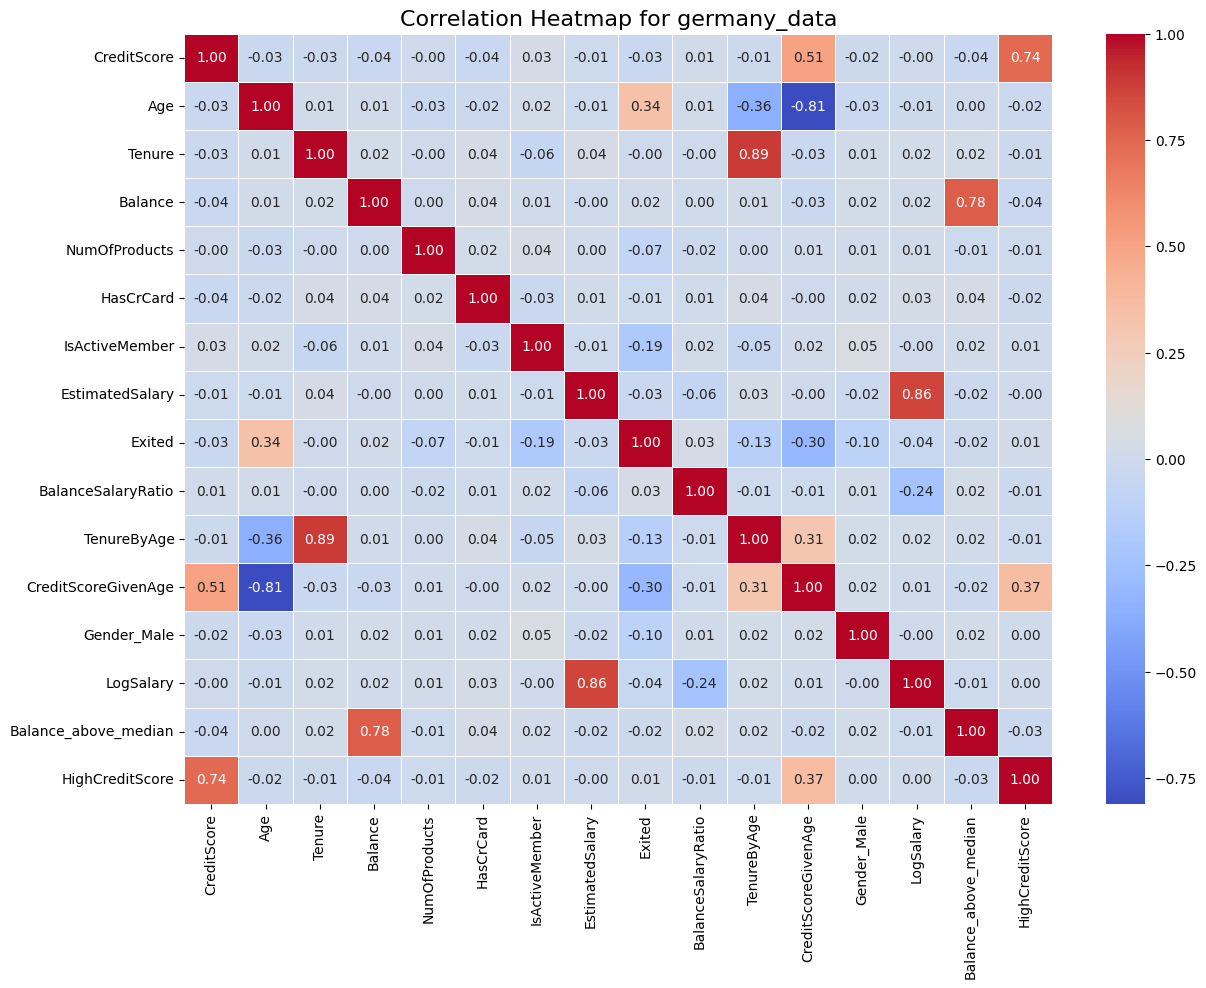

In [26]:
# Удалим признаки, которые могут быть мультиколлинеарны или менее информативны
plt.figure(figsize=(14, 10))
sns.heatmap(germany_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for germany_data", fontsize=16)
plt.show()

In [27]:
# мультиколлинеарность, удалим эти признаки
germany_data = germany_data.drop(['Age', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Balance'], axis=1)

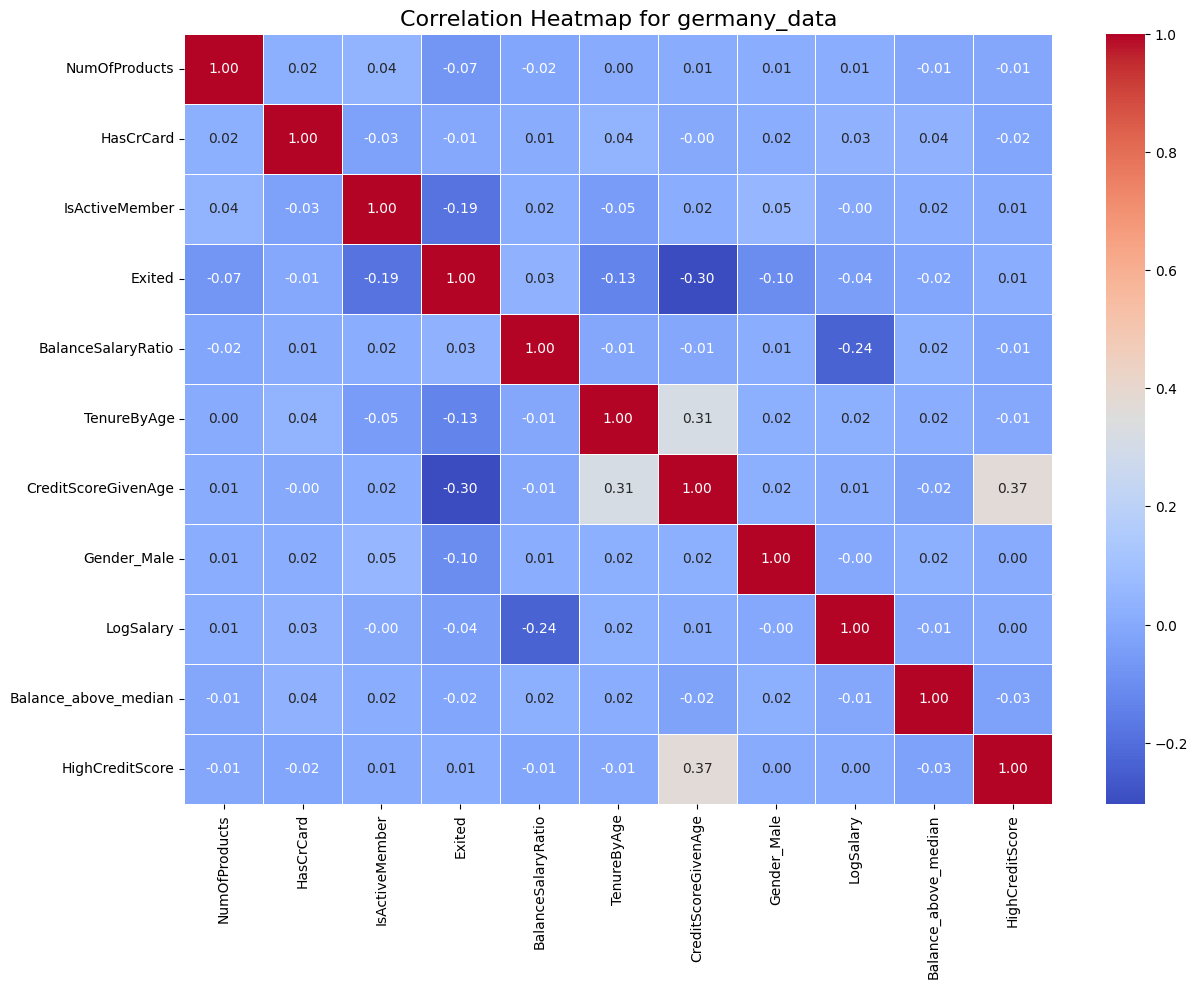

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(germany_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for germany_data", fontsize=16)
plt.show()

In [29]:
# по условию задачи нужно разделить выборку на тренировочную и тестовую и работать с изначальными данными
X = germany_data.drop("Exited", axis=1)
y = germany_data["Exited"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 10)
Test shape: (628, 10)


Импортируем необходимые для выполнения практики модули:

In [30]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [31]:
# Ваш код здесь
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       424
           1       0.57      0.54      0.56       204

    accuracy                           0.72       628
   macro avg       0.68      0.67      0.68       628
weighted avg       0.72      0.72      0.72       628



> Ваши выводы и рассуждения:
> 
> произошло переобучение, из-за неограниченной максимальной глубиной дерева. Модель выдала "идеальный" результат для тренировочной выборки F1/Precision/Recall = 1.0.
> 
> На тестовой выборке результат уже не такой идеальный F1 score 0.56 для определения ключевого признака.

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [32]:
# Ваш код здесь

dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8, # ограничение глубины дерева по условию задачи
    min_samples_leaf=10, # минимальное число объектов в листе
    random_state=42,
    class_weight='balanced' # для борьбы с дисбалансом
)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1271
           1       0.70      0.77      0.73       610

    accuracy                           0.82      1881
   macro avg       0.79      0.81      0.80      1881
weighted avg       0.82      0.82      0.82      1881

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       424
           1       0.58      0.66      0.62       204

    accuracy                           0.74       628
   macro avg       0.70      0.72      0.71       628
weighted avg       0.75      0.74      0.74       628



> Ваши выводы и рассуждения:
>
> По ключевой метрике, мы получили F1 = 0.73 на тренировочной выборке и F1=0.62 на тестовой. Неплохой результат. Возможно улучшить подбором параметров depth/leaf.

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [33]:
# Ваш код здесь

rf = ensemble.RandomForestClassifier(
    n_estimators=500, # количество деревьев
    max_depth=8, # ограничение глубины дерева по условию задачи
    criterion='entropy',
    min_samples_leaf=10, # минимальное число объектов в листе
    random_state=42,
    class_weight='balanced' # для борьбы с дисбалансом
)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1271
           1       0.71      0.79      0.75       610

    accuracy                           0.83      1881
   macro avg       0.80      0.82      0.81      1881
weighted avg       0.83      0.83      0.83      1881

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       424
           1       0.63      0.72      0.67       204

    accuracy                           0.77       628
   macro avg       0.74      0.76      0.75       628
weighted avg       0.78      0.77      0.77       628



> Ваши выводы и рассуждения:
> 
> Ключевая метрика улучшилась, мы получили F1 = 0.75 на тренировочной выборке и F1=0.67 на тестовой. Хороший результат

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

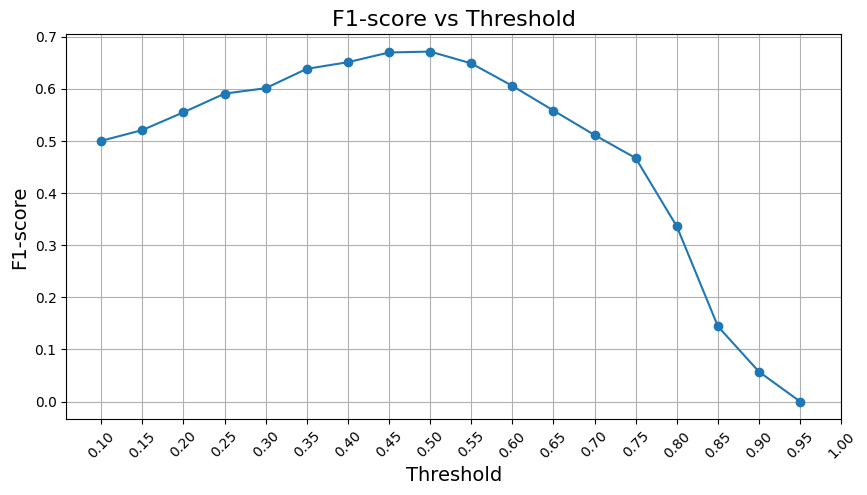

In [34]:
# Ваш код здесь

# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(rf.predict_proba(X_test)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.f1_score(y_test, y_test_pred)
    # Добавляем результат в список
    scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, scores, marker='o')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.title('F1-score vs Threshold', fontsize=16)
plt.xticks(np.arange(0.1, 1.05, 0.05), rotation=45)
plt.grid(True)
plt.show()

In [35]:
# Предсказание классов с оптимальным порогом вероятности для случайного леса
best_threshold = 0.49

y_test_pred_opt = (pd.Series(rf.predict_proba(X_test)[:, 1]) > best_threshold).astype(int)

print("F1-score на тестовой выборке:", metrics.f1_score(y_test, y_test_pred_opt))
print(metrics.classification_report(y_test, y_test_pred_opt))

F1-score на тестовой выборке: 0.6801801801801802
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       424
           1       0.63      0.74      0.68       204

    accuracy                           0.77       628
   macro avg       0.75      0.77      0.75       628
weighted avg       0.79      0.77      0.78       628



> Ваши выводы и рассуждения:
>
>По графику зависимости целевой метрики от порога вероятности, порог вероятности 0.49 дает наилучшую метрику F1 ~0.68
>
>Использование оптимального порога вероятности 0.49 улучшило F1 метрику с 0.67 до 0.68
>
>Вывод: опираясь на все результаты F1 метрики, наилучший результат показала модель "Случайный лес / RandomForestClassifier"

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [36]:
# Ваш код здесь

# Данные Василия
vasiliy = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
vasiliy_df = pd.DataFrame(vasiliy)

#Создадим новые признаки для Василия
vasiliy_df['BalanceSalaryRatio'] = vasiliy_df['Balance'] / vasiliy_df['EstimatedSalary']
vasiliy_df['TenureByAge'] = vasiliy_df['Tenure'] / vasiliy_df['Age']
vasiliy_df['CreditScoreGivenAge'] = vasiliy_df['CreditScore'] / vasiliy_df['Age']
vasiliy_df['Gender_Male'] = vasiliy_df['Gender'].apply(lambda x: True if x == 'Male' else False)
vasiliy_df['LogSalary'] = np.log1p(vasiliy_df['EstimatedSalary'])
vasiliy_df['Balance_above_median'] = vasiliy_df['Balance'] > vasiliy_df['Balance'].median()
vasiliy_df['HighCreditScore'] = vasiliy_df['CreditScore'] > vasiliy_df['CreditScore'].quantile(0.75)
vasiliy_df = vasiliy_df.drop(['Gender', 'Age', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Balance'], axis=1)

vasiliy_df.head()

,NumOfProducts,HasCrCard,IsActiveMember,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Male,LogSalary,Balance_above_median,HighCreditScore
0,1.0,1.0,0.0,2.461485,0.02381,14.309524,True,10.597029,False,False


In [37]:
# сравним признаки с обучающей выборкой
missing_cols = set(germany_data.columns) - set(vasiliy_df.columns)
print(missing_cols)

{'Exited'}


In [38]:
# Предсказание вероятности оттока (методом случайного леса)
prob_rf = rf.predict_proba(vasiliy_df)[0, 1]
print(f"Вероятность оттока Василия (RandomForest): {prob_rf:.2f}")

Вероятность оттока Василия (RandomForest): 0.83


Добрый день, Тимур!

Спасибо за выполненное домашнее задание. Ваша работа выполнена на очень высоком уровне: внимание к деталям, аккуратность и профессиональный подход заслуживают самой высокой оценки.

Хочу подробнее отметить ключевые сильные стороны проекта:
- Корректность решений. Все задания выполнены верно и с применением оптимальных методов. Это подтверждает не только хорошее знание материала, но и уверенное владение инструментами анализа, что особенно важно в практической деятельности.
- Код и его качество. Программа написана последовательно и структурированно, логика читается легко. Комментарии помогают быстро понять ход рассуждений, что значительно повышает удобство командной работы и поддержку проекта в будущем.
- Визуализация. Построенные графики и диаграммы информативны, аккуратно оформлены и гармонично встроены в общий анализ.
- Выводы. Итоговые результаты изложены чётко, логично и по существу, без избыточных деталей. Умение выделять главное делает ваши выводы особенно ценными для представления руководителям и заказчикам.
- Понимание задач. Вы продемонстрировали системный подход и глубокое понимание контекста проекта, что свидетельствует о зрелом уровне мышления.
- Практическая ценность. Работа выглядит готовой к применению в реальных условиях. Это не только учебный, но и прикладной проект, что является важным преимуществом.

В целом задание выполнено на отличном уровне. Вы показали качества, которые высоко ценятся в профессиональной среде: внимательность, логичность, аккуратность и умение находить эффективные решения. Продолжайте развиваться — уверен, впереди у вас будет ещё много интересных и успешных проектов.

Что касается рекомендованной литературы:

1. Аурелиен Жерон — Прикладное машинное обучение с помощью Scikit-Learn, Keras и TensorFlow (глава о выборе признаков и важности признаков).
2. Тревор Хасти, Роберт Тибширани, Джером Фридман — The Elements of Statistical Learning (разделы о методах выбора переменных).
3. Стивен Марсленд — Машинное обучение. Алгоритмы, практическая реализация на языке Python (часть о предварительной обработке данных и отборе признаков).
4. Хабр — статья «Методы отбора признаков в задачах машинного обучения».
5. Towards Data Science — статья «A Comprehensive Guide to Feature Selection in Machine Learning».

С уважением,
Владимир Ковалев